In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()

In [4]:
iris_data.data.shape

(150, 4)

In [5]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
X = iris_data.data

In [10]:
y = iris_data.target

In [11]:
import seaborn as sns

In [21]:
df = pd.DataFrame(X, columns=[iris_data.feature_names])

In [22]:
df["species"] = y

In [23]:
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
sns.pairplot(data=df, hue="species")
plt.show()

In [30]:
X = ( X - X.mean(axis=0) ) / X.std(axis=0)

In [35]:
sigma = np.cov(X.T)

In [36]:
eig_val, eig_vec = np.linalg.eig(sigma)

In [37]:
eig_vec = eig_vec.T

In [45]:
max_indexes = eig_val.argsort()[::-1]

In [46]:
max_indexes

array([0, 1, 2, 3])

In [56]:
max_axis = eig_vec[max_indexes[:2]]

In [57]:
X_reduced = np.dot(X, max_axis.T)

In [58]:
X_reduced.shape

(150, 2)

In [66]:
a = np.arange(20)
a [ a > 5 ]


array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [63]:
y == 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

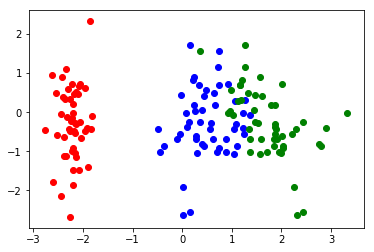

In [67]:
plt.scatter(X_reduced[y==0,0], X_reduced[y==0,1], c='r')
plt.scatter(X_reduced[y==1,0], X_reduced[y==2,1], c='b')
plt.scatter(X_reduced[y==2,0], X_reduced[y==2,1], c='g')
plt.show()

In [70]:
sum(eig_val[:2]) / sum(eig_val) * 100

95.81320720000164

In [73]:
class_1 = np.array([
    [1,2],
    [2,1],
    [2,2],
    [2,3],
    [1,3]
])

class_2 = np.array([
    [4,2],
    [4,3],
    [3,3],
    [3,4],
    [4,1]
])

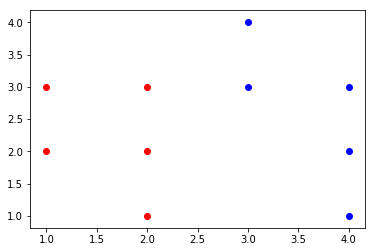

In [75]:
plt.scatter(class_1[:,0], class_1[:,1], c='r')
plt.scatter(class_2[:,0], class_2[:,1], c='b')
plt.show()

In [76]:
scatter_within_1 = np.cov(class_1.T)

In [78]:
scatter_within_2 = np.cov(class_2.T)

In [79]:
within_class_scatter = scatter_within_1 + scatter_within_2

In [80]:
mean_class1 = class_1.mean(axis=0)

In [82]:
mean_class2 = class_2.mean(axis=0)

In [85]:
meu = np.array([mean_class1, mean_class2])

In [87]:
between_class_scatter = np.cov(meu.T)

In [88]:
mat = between_class_scatter.dot( np.linalg.inv(within_class_scatter))

In [90]:
eig_val, eig_vec = np.linalg.eig(mat)

In [91]:
eig_vec = eig_vec.T

In [93]:
eig_val

array([5.39047619, 0.        ])

In [94]:
lda1 = eig_vec[0]

In [96]:
class_1_reduced = np.dot(lda1, class_1.T)

In [97]:
class_2_reduced = np.dot(lda1, class_2.T)

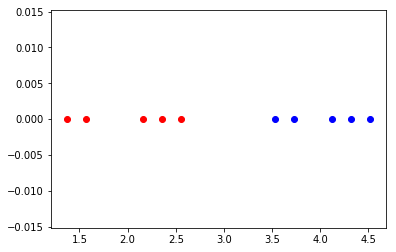

In [98]:
plt.scatter(x=class_1_reduced, y=np.zeros(5), c='r')
plt.scatter(x=class_2_reduced, y=np.zeros(5), c='b')
plt.show()

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [109]:
lda = LDA(n_components=1)

In [110]:
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [111]:
X_reduced = lda.transform(X)

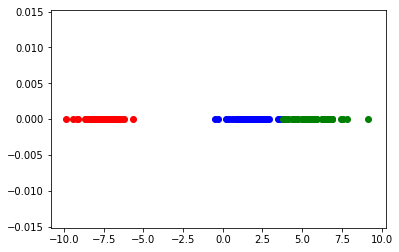

In [113]:
plt.scatter(X_reduced[y==0], y=np.zeros(50), c='r')
plt.scatter(X_reduced[y==1], y=np.zeros(50), c='b')
plt.scatter(X_reduced[y==2], y=np.zeros(50), c='g')
plt.show()

In [108]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [115]:
from sklearn.datasets import load_wine

In [116]:
wine_data = load_wine()

In [117]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1